In [83]:
import pandas as pd
import numpy as np
import stumpy
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# STUMPY 

**FUNCIONES**

In [84]:
def graph_best_motif(x, y, best_motifs, m):
    
    fig = make_subplots(rows=1, cols=1, shared_xaxes=False, vertical_spacing=0.08)

    fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=1, col=1)

    fig.add_shape(
        type="line",
        x0=x[best_motifs.index[0]], y0=min(y), x1=x[best_motifs.index[0]], y1=max(y),
        line=dict(color="green"),
        row=1, col=1
    )
    fig.add_shape(
        type="rect",
        x0=x[best_motifs.index[0]], y0=min(y), x1=x[best_motifs.index[0]] + m, y1=max(y),
        fillcolor="green", opacity=0.5,
        row=1, col=1
    )

    fig.add_shape(
        type="line",
        x0=x[best_motifs.index[1]], y0=min(y), x1=x[best_motifs.index[1]], y1=max(y),
        line=dict(color="red"),
        row=1, col=1
    )
    fig.add_shape(
        type="rect",
        x0=x[best_motifs.index[1]], y0=min(y), x1=x[best_motifs.index[1]] + m, y1=max(y),
        fillcolor="red", opacity=0.5,
        row=1, col=1
    )
    
    fig.update_layout(height=300, grid=dict(rows=1, columns=1))
    fig.add_annotation(text="Mejor motif", xref="paper", yref="paper", x=0.5, y=1.23, showarrow=False)
    fig.show()

    
def graph_matrix_profile(x, y, best_motifs, profile_df, m):
    
    fig = make_subplots(rows=1, cols=1, shared_xaxes=False, vertical_spacing=0.08)

    
    fig.add_trace(go.Scatter(x=profile_df.index, y=profile_df['profile'], mode='lines'), row=1,
                  col=1)

    for idx in best_motifs.index:
        fig.add_shape(
            type="line",
            x0=idx, y0=min(profile_df['profile']), x1=idx, y1=max(profile_df['profile']),
            line=dict(color="orange"),
            row=1, col=1
        )
    
    fig.update_layout(height=300, grid=dict(rows=1, columns=1))
    fig.add_annotation(text="Matrix Profile", xref="paper", yref="paper", x=0.5, y=1.23, showarrow=False)
    
    fig.show()
    
def graph_amplified_best_motif(x, y, best_motifs, m):
    
    fig = make_subplots(rows=1, cols=1, shared_xaxes=False, vertical_spacing=0.08)
    
    for idx in best_motifs.index:
        plot_y = y[idx:(idx + m)]
        fig.add_trace(go.Scatter(x=list(range(m)), y=plot_y, mode='lines'), row=1, col=1)

    fig.add_annotation(text="Comparativa ampliada del mejor motif", xref="paper", yref="paper", x=0.5, y=1.23,
                       showarrow=False)
    fig.update_layout(height=300, grid=dict(rows=1, columns=1))
    fig.update_traces(showlegend=False)

    fig.show()
    
def graph_anomalous_window(x, y, matrix_profile_df, m):
    
    profile_df = matrix_profile_df[['profile']]

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

    # Subplot 1: Time series y vs. x with highlighted anomaly region
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=1, col=1)
    discord = matrix_profile_df[matrix_profile_df['profile'] == matrix_profile_df['profile'].max()]
    fig.add_shape(
        type="rect",
        x0=discord.index[0], y0=min(y), x1=discord.index[0] + m, y1=max(y),
        fillcolor="red", opacity=0.4,
        row=1, col=1
    )
    fig.add_shape(
        type="line",
        x0=discord.index[0], y0=min(y), x1=discord.index[0], y1=max(y),
        line=dict(color="red"),
        row=1, col=1
    )

    # Subplot 2: Matrix Profile
    fig.add_trace(go.Scatter(x=profile_df.index, y=profile_df['profile'], mode='lines'), row=2, col=1)
    largest_discord = matrix_profile_df[matrix_profile_df['profile'] == matrix_profile_df['profile'].max()]
    fig.add_shape(
        type="line",
        x0=largest_discord.index[0], y0=min(profile_df['profile']), x1=largest_discord.index[0],
        y1=max(profile_df['profile']),
        line=dict(color="blue"),
        row=2, col=1
    )

    fig.update_layout(height=600, grid=dict(rows=2, columns=1))
    fig.update_traces(showlegend=False)
    fig.add_annotation(text="Ventana más anómala", xref="paper", yref="paper", x=0.5, y=1.05, showarrow=False)
    fig.add_annotation(text="Matrix Profile", xref="paper", yref="paper", x=0.5, y=0.48, showarrow=False)

    fig.show()
    
def graph_cadenas(y, matrix_profile, m):
    all_chain_set, unanchored_chain = stumpy.allc(matrix_profile[:, 2], matrix_profile[:, 3])
    num_colors = len(unanchored_chain)
    color_palette = ["hsl(" + str(h) + ",50%" + ",50%)" for h in np.linspace(0, 360, num_colors, endpoint=False)]
    fig = go.Figure()
    x_range = list(range(len(y)))
    fig.add_trace(go.Scatter(x=x_range, y=y, mode='lines'))

    for idx, color in zip(unanchored_chain, color_palette):
        fig.add_shape(
            type="rect",
            x0=idx, y0=min(y), x1=idx + m, y1=max(y),
            fillcolor=color, opacity=0.5
        )

    fig.update_layout(
        title="Cadenas en series temporales",

    )

    fig.show()

**CARGAR LOS DATOS**

In [101]:
path = "../data/time-series/causal_data.csv"

m = 50

df = pd.read_csv(path)

df = pd.read_csv("../data/time-series/elecdemand.csv",         
                 delimiter=',',nrows=300)
df
df['Demand'] = df['Demand'].astype(float)

if isinstance(1, int):
    y = df.iloc[:, 1]
else:
    y = df[1]

x = df.index

**EL MOTIF CON MAYOR SIMILITUD**

In [102]:
matrix_profile = stumpy.stump(y, m)
matrix_profile_df = pd.DataFrame(matrix_profile,
                                 columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [103]:
profile_df = matrix_profile_df[['profile']]

best_motifs = matrix_profile_df[matrix_profile_df['profile'] == matrix_profile_df['profile'].min()]

In [104]:
graph_best_motif(x, y, best_motifs, m)

graph_matrix_profile(x, y, best_motifs, profile_df, m)

graph_amplified_best_motif(x, y, best_motifs, m)

**LOCALIZAR LA VENTANA MÁS ANÓMALA**

In [105]:
graph_anomalous_window(x, y, matrix_profile_df, m)

**CADENAS**

In [ ]:
graph_cadenas(y, matrix_profile, m)

# FFT

**CARGAR LOS DATOS**

In [128]:
import pandas as pd
import numpy as np
from rich import print
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv("../data/time-series/elecdemand.csv",         
                 delimiter=',')
df

,Datetime,Demand
0,2000-06-05 00:00,44018
1,2000-06-05 01:00,45006
2,2000-06-05 02:00,44862
3,2000-06-05 03:00,43988
4,2000-06-05 04:00,43087
...,...,...
2011,2000-08-27 19:00,53091
2012,2000-08-27 20:00,56633
2013,2000-08-27 21:00,56623
2014,2000-08-27 22:00,53129


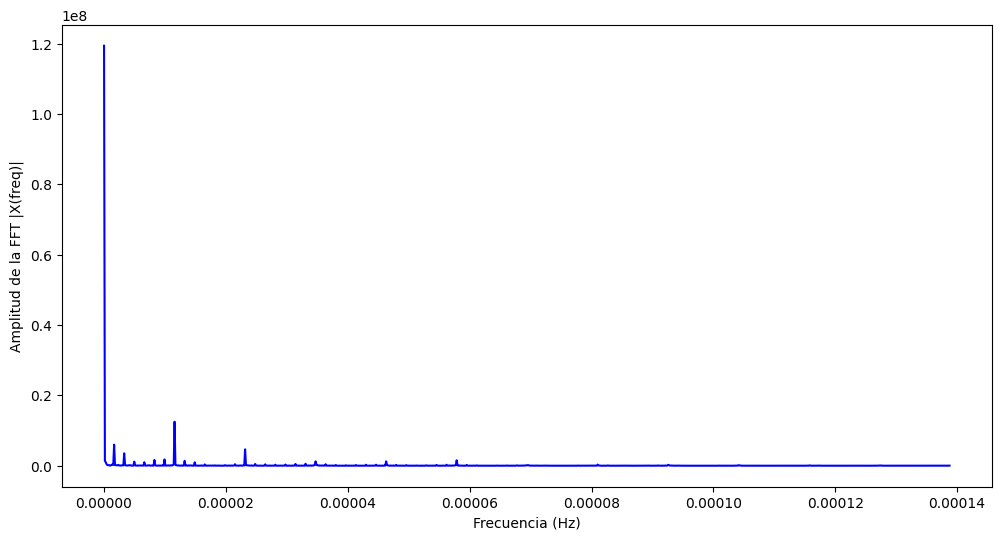

In [142]:
from scipy.fftpack import fft, ifft

#numeric_df = utils.numeric_df(df)

data_array = df['Demand'].to_numpy()


X = fft(data_array)
N = len(X)
n = np.arange(N)



# sampling rate
# dia 60*60*24
# horas 60*60
# minutos 60

dia = 60*60*24
hora = 60*60
minuto = 60

sr = 1 / hora
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud de la FFT |X(freq)|')

plt.show()

In [131]:
# frecuencia de reconstruccion, no tiene que ser la misma que la ts
t_h = 1/f_oneside / dia

fig = go.Figure(go.Scatter(x=t_h, y=np.abs(X[:n_oneside]) / n_oneside, mode='lines'))

fig.update_xaxes(range=[0, 10], title_text='Period ($day$)')
fig.update_yaxes(range=[0, 14500], title_text='Amplitude')

fig.update_layout(width=1200, height=400)

fig.show()

In [132]:
## QUITAR RUIDO A SEÑALES ESTACIONALES

In [136]:
ruido = 2000
columna = 'Demand'
df_ruido = df.copy()
df_ruido[columna] += np.random.normal(0, ruido, size=df.shape[0])

In [137]:
def denoise_signal(data,column, cutoff_freq):   
    fft_result = np.fft.fft(data[column])
    fft_result_filtered = fft_result.copy()
    fft_result_filtered[(cutoff_freq + 1):(-cutoff_freq)] = 0
    data_denoised = np.fft.ifft(fft_result_filtered)
    data[column] = data_denoised
    return data

In [138]:
fc = 100
df_demanda_denoised = denoise_signal(df_ruido.copy(),columna, fc)

In [139]:
def plot_signal(data, column):
    """
    Grafica una señal en el dominio del tiempo.

    Parámetros:
    - data: DataFrame original.
    - columna: variable con la señal a analizar.
    """
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(len(data[column])), y=np.real(data[column]), mode='lines', name='Señal'))
    fig.update_layout(title='Señal', xaxis_title='Tiempo', yaxis_title='Amplitud')
    fig.show()

In [141]:
plot_signal(df,columna) #original
plot_signal(df_ruido, columna) #con ruido
plot_signal(df_demanda_denoised,columna) #sin ruido

In [ ]:
df = pd.read_csv("../data/household_power_consumption.csv", sep=',')[0:500]
column = "Global_reactive_power"
ruido = 30
fc=130
df_original = df.copy()
df[column] += np.random.normal(0, ruido, size=df.shape[0])
denoised_df = utils.denoise_signal(df.copy(), column, fc)


utils.plot_signal(df_original,column) #original
utils.plot_signal(df, column) #con ruido
utils.plot_signal(denoised_df, column) #"sin ruido"